In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
### Creating data set

# 1
one = [0,0,1,0,0,0,
       0,0,1,0,0,0,
       0,0,1,0,0,0,
       0,0,1,0,0,0,
       0,0,1,0,0,0]
#2
two = [0,1,1,1,1,0,
       0,0,0,0,1,0,
       0,0,0,1,0,0,
       0,0,1,0,0,0,
       0,1,1,1,1,0]
#3
three = [0,1,1,1,1,0,
        0,0,0,0,1,0,
        0,0,1,1,1,0,
        0,0,0,0,1,0,
        0,1,1,1,1,0]

#creating labels
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

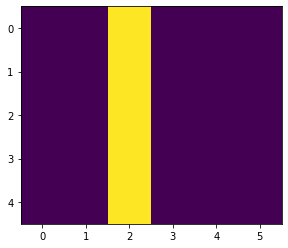

In [9]:
#ploting number 1
plt.imshow(np.array(one).reshape(5,6))
plt.show()

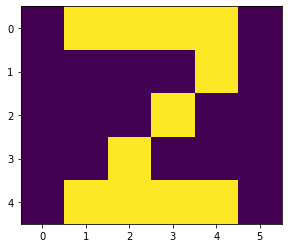

In [10]:
#ploting number 2
plt.imshow(np.array(two).reshape(5,6))
plt.show()

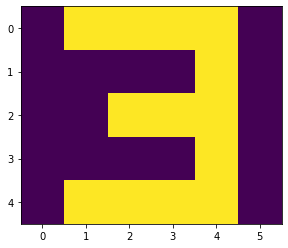

In [11]:
#ploting number 3
plt.imshow(np.array(three).reshape(5,6))
plt.show()

In [12]:
x = [np.array(one).reshape(1,30), np.array(two).reshape(1,30), np.array(three).reshape(1,30)]
y = np.array(y)

# DNN we are going to implement and train

![FNN](FNN.png)

In [13]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [14]:
def loss(out,y):
    s = (np.square(out-y))
    s = np.sum(s)/len(y)
    return s

In [ ]:
def feed_forward(x,w1, w2):
    #hidden layer
    z1 = x.dot(w1) ### input of layer 1
    a1 = sigmoid(z1) ### output of layer 1
    
    #output layer
    z2 = a1.dot(w2) ## input of layer 2
    a2 = sigmoid(z2) ## output of layer 2
    return a2

In [ ]:
def generate_weights(x,y):
    weights = []
    for i in range(x*y):
        weights.append(np.random.randn())
    return np.array(weights).reshape(x,y)

In [ ]:
def back_propagation(x,y,w1,w2,learning_rate):
    #hidden layer
    z1 = x.dot(w1) ### input of layer 1
    a1 = sigmoid(z1) ### output of layer 1
    
    #output layer
    z2 = a1.dot(w2) ## input of layer 2
    a2 = sigmoid(z2) ## output of layer 2
    
    d2  = (a2-y)
    d1 = np.multiply(w2.dot((d2.transpose())).transpose(),(np.multiply(a1,1-a1)))
    
    #Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    
    #Updating parameters
    w1 = w1 - (learning_rate*(w1_adj))
    w2 = w2 - (learning_rate*(w2_adj))
    
    return (w1,w2)
    
    
    

In [ ]:
def training(x,y, w1,w2,learning_rate=0.01, epochs = 10):
    accuracies = []
    losses = []
    for j in range(epochs):
        l = []
        for i in range(len(x)):
            out = feed_forward(x[i],w1,w2)
            l.append(loss(out, y[i]))
            w1,w2 = back_propagation(x[i],y[i], w1,w2,learning_rate)
        acc = (1-(sum(l)/len(x)))*100
        print("epochs:",j+1, "=========> accuracy:", acc)
        accuracies.append(acc)
        losses.append(sum(l)/len(x))
    return accuracies,losses, w1, w2

In [ ]:
def predict(x, w1, w2):
    output = feed_forward(x,w1,w2)
    maxim = 0
    k = 0 
    for i in range(len(output[0])):
        if (maxim<output[0][i]):
            maxim = output[0][i]
            k = i
    if k == 0:
        print("Image is of number 1")
    elif k == 1:
        print("Image is of number 2")
    else:
        print("Image is of number 3")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [ ]:
w1 = generate_weights(30, 5)
w2 = generate_weights(5, 3)
print(w1,"\n\n",w2)

[[-0.10357146 -1.12055055 -0.36652537 -1.46111569  0.1004862 ]
 [-1.39491039  0.15999027  0.3538702   0.03890477  0.79829423]
 [-0.31377623  1.73590844  1.39364321  0.35306855 -0.70836075]
 [-0.04547291 -2.4590494  -0.6174317  -0.23763385 -1.21654814]
 [ 1.39793363 -0.20483459  0.77939161 -0.14700953 -0.47697976]
 [-0.97572002 -0.45556118 -0.51763661 -0.60866157  0.6404417 ]
 [-0.66117707  0.67449978 -1.32410069 -1.2263536  -0.60038201]
 [ 0.2077609   0.1370625  -1.18482849  0.98225312 -0.29658573]
 [-0.91673408  0.17209553 -0.75870316 -0.31263181 -1.2461578 ]
 [-0.26452259 -1.31284536  0.63236825 -0.11234911  0.63406461]
 [-0.20370955  0.31603287  1.74082231  0.50134533  1.19649374]
 [-0.89126465  0.72207394 -0.06981462  0.14301947 -0.85050884]
 [ 0.73315705 -1.75170201 -1.82539943 -1.22824812  1.99086385]
 [ 0.05397512 -0.0303213  -0.7511788   1.93739842  0.01465169]
 [-1.30674216 -0.38676583  1.99869374  0.5126857   0.39124714]
 [-1.28740253 -0.15951756 -1.15568812  1.65862484  1.59

In [ ]:
accuraccies, losses, trained_w1, trained_w2 = training(x,y,w1,w2, 0.5,100)

epochs: 1 =========> accuracy: 62.36832103902539
epochs: 2 =========> accuracy: 71.71795653089671
epochs: 3 =========> accuracy: 74.80337659095476
epochs: 4 =========> accuracy: 76.78732231580496
epochs: 5 =========> accuracy: 78.30747812287481
epochs: 6 =========> accuracy: 79.71539389998902
epochs: 7 =========> accuracy: 81.2177952723843
epochs: 8 =========> accuracy: 82.95074295051485
epochs: 9 =========> accuracy: 84.95886356445837
epochs: 10 =========> accuracy: 87.13231163938667
epochs: 11 =========> accuracy: 89.23238594041499
epochs: 12 =========> accuracy: 91.0718553645316
epochs: 13 =========> accuracy: 92.6028648957099
epochs: 14 =========> accuracy: 93.84844194369325
epochs: 15 =========> accuracy: 94.85244221285984
epochs: 16 =========> accuracy: 95.66054416309444
epochs: 17 =========> accuracy: 96.31308670433056
epochs: 18 =========> accuracy: 96.84309095985819
epochs: 19 =========> accuracy: 97.27660405131982
epochs: 20 =========> accuracy: 97.6338436613311
epochs: 21 ==

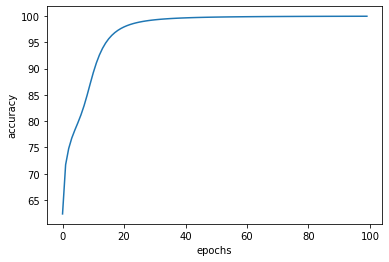

In [ ]:
plt.plot(accuraccies)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

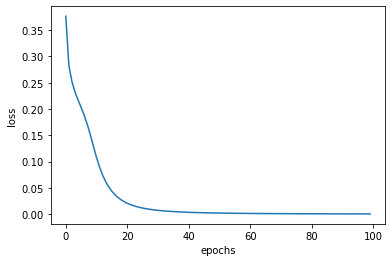

In [ ]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Image is of number 3


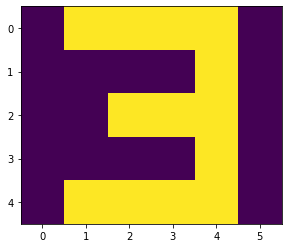

In [ ]:
predict(x[2],trained_w1,trained_w2)